# Crop Recommendation Model

## Business Understanding

### Problem Statement :

Farmers face significant challenges in maximizing crop yield, primarily due to the improper selection and application of fertilizers.

Among the challenges farmers face include:
- Crop Selection Uncertainty: Farmers may not know which crops are best suited for their soil and climate conditions, leading to poor yields and economic loss.


- Fertilizer Mismanagement: Incorrect use of fertilizers can result in soil nutrient imbalances, affecting crop health and yield. Farmers may not know the right type or amount of fertilizer required for their crops.


- Plant Disease Identification: Identifying plant diseases can be difficult for farmers, especially without expert knowledge. Delayed or incorrect diagnosis can lead to severe crop damage and lower productivity.

To enhance decision-making, a data-driven recommendation system is needed that provides personalized, actionable insights.

### Objective

The primary goal of this project is to develop an intelligent crop and fertilizer recommendation system that assists farmers in optimizing their farming practices. The system will recommend the most suitable crops and fertilizers based on factors such as soil composition, crop type and weather patterns. By leveraging machine learning and data analytics, the system aims to improve crop yields, reduce costs, and promote sustainable agricultural practices.


### Solutions and Benefits

The solutions the recommendation sytem will provide include:

- Crop Recommendation: By using machine learning to analyze soil data provided by the user, your application can predict the most suitable crops for a specific soil type, enabling farmers to make informed decisions and improve yields.


- Fertilizer Recommendation: Based on the user's soil data and the type of crop they are growing, the application can recommend the appropriate fertilizer by identifying any deficiencies or excess nutrients in the soil, ensuring better crop growth and healthier soil.


- Plant Disease Prediction: The image recognition feature allows users to upload images of diseased plant leaves. The application then predicts the disease and offers background information and treatment suggestions, enabling timely and effective intervention.


The key benefits of using our recommendation system include:
1. Increased Crop Yield: Farmers will receive precise recommendations for crops and fertilizers, leading to significant improvements in crop productivity.
2. Cost Efficiency: By optimizing fertilizer use and avoiding over-application, farmers can reduce costs while maintaining or increasing yields.
3. Sustainability: The system will promote responsible fertilizer use, reducing the risk of soil degradation and environmental pollution.
4. Personalized Recommendations: Tailored insights based on specific farm conditions (soil properties, climate, and crop type) ensure relevant and actionable advice for each farmer.
5. Disease Management: By integrating plant disease prediction features, the system can help farmers identify and treat crop diseases in a timely manner, minimizing losses.

## Data Understanding

- Crop Dataset: Contains information on various crops, including environmental conditions (temperature, humidity, pH), soil type, and yield data. This data helps identify suitable crops for specific conditions and regions.


- Fertilizer Dataset: Contains details on different fertilizers and their effects on various crops. This is key for understanding optimal fertilizer types and quantities for improved yield.


- Disease Dataset: Includes data on plant diseases, symptoms, affected crops, and preventive measures. Understanding disease patterns is essential for timely diagnosis and prevention.



### Feature Distributions

- Numerical Variables: Summarizing key statistics for temperature, humidity, soil pH, etc., to understand typical ranges, outliers, and potential skewness in values.


- Categorical Variables: Exploring the diversity in crop types, soil types, and fertilizer types. This helps determine the coverage and variety in the data.



In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv('crop_recommendation.csv')

In [3]:
df.head(15)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [11]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
#Checking for missing values
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [13]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [14]:
from scipy import stats



numeric_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

z_scores = np.abs(stats.zscore(df[numeric_columns]))


threshold = 3

outliers = (z_scores > threshold).any(axis=1)

outliers_percentage = (outliers.sum() / len(df)) * 100

df_cleaned = df[~outliers]

initial_shape = df.shape
cleaned_shape = df_cleaned.shape

outliers_percentage, initial_shape, cleaned_shape


(np.float64(7.7727272727272725), (2200, 8), (2029, 8))

In [15]:
df = df_cleaned

In [16]:
#Checking correlation between the features
Numeric_crop = df.select_dtypes(include=['float', 'int64'])
corr= Numeric_crop.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.180935,-0.053720,0.017168,0.213675,0.102337,0.016604
P,-0.180935,1.000000,0.613340,-0.103238,-0.234899,-0.088198,-0.043193
K,-0.053720,0.613340,1.000000,-0.127508,0.127884,-0.121372,-0.026871
temperature,0.017168,-0.103238,-0.127508,1.000000,0.241654,-0.039885,-0.052937
humidity,0.213675,-0.234899,0.127884,0.241654,1.000000,0.028214,0.071275
ph,0.102337,-0.088198,-0.121372,-0.039885,0.028214,1.000000,-0.121635
rainfall,0.016604,-0.043193,-0.026871,-0.052937,0.071275,-0.121635,1.000000


<Axes: >

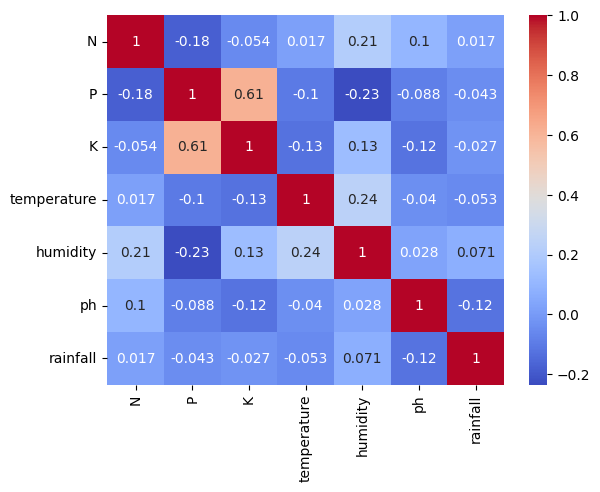

In [17]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

- Observations:

###### *P and K*:
There is a strong positive correlation (0.74) between Phosphorus and Potassium, suggesting that as levels of one increase, so do levels of the other. This could indicate that these nutrients are often found together or are similarly influenced by soil and environmental conditions.

###### *K and temperature*: 
There is a moderate negative correlation (-0.16) between Potassium and temperature, suggesting that as temperature increases, Potassium levels might slightly decrease.

###### *Humidity and rainfall*: 
There’s a low positive correlation (0.1) between humidity and rainfall, indicating a weak association between these two variables.

###### *pH and other factors*:
pH shows very low correlations with most variables, indicating it is largely independent within this dataset.

Most other variable pairs show very weak correlations (values close to 0), suggesting little to no linear association between them.

## Exploratory Data Analysis

### Univariate Analysis

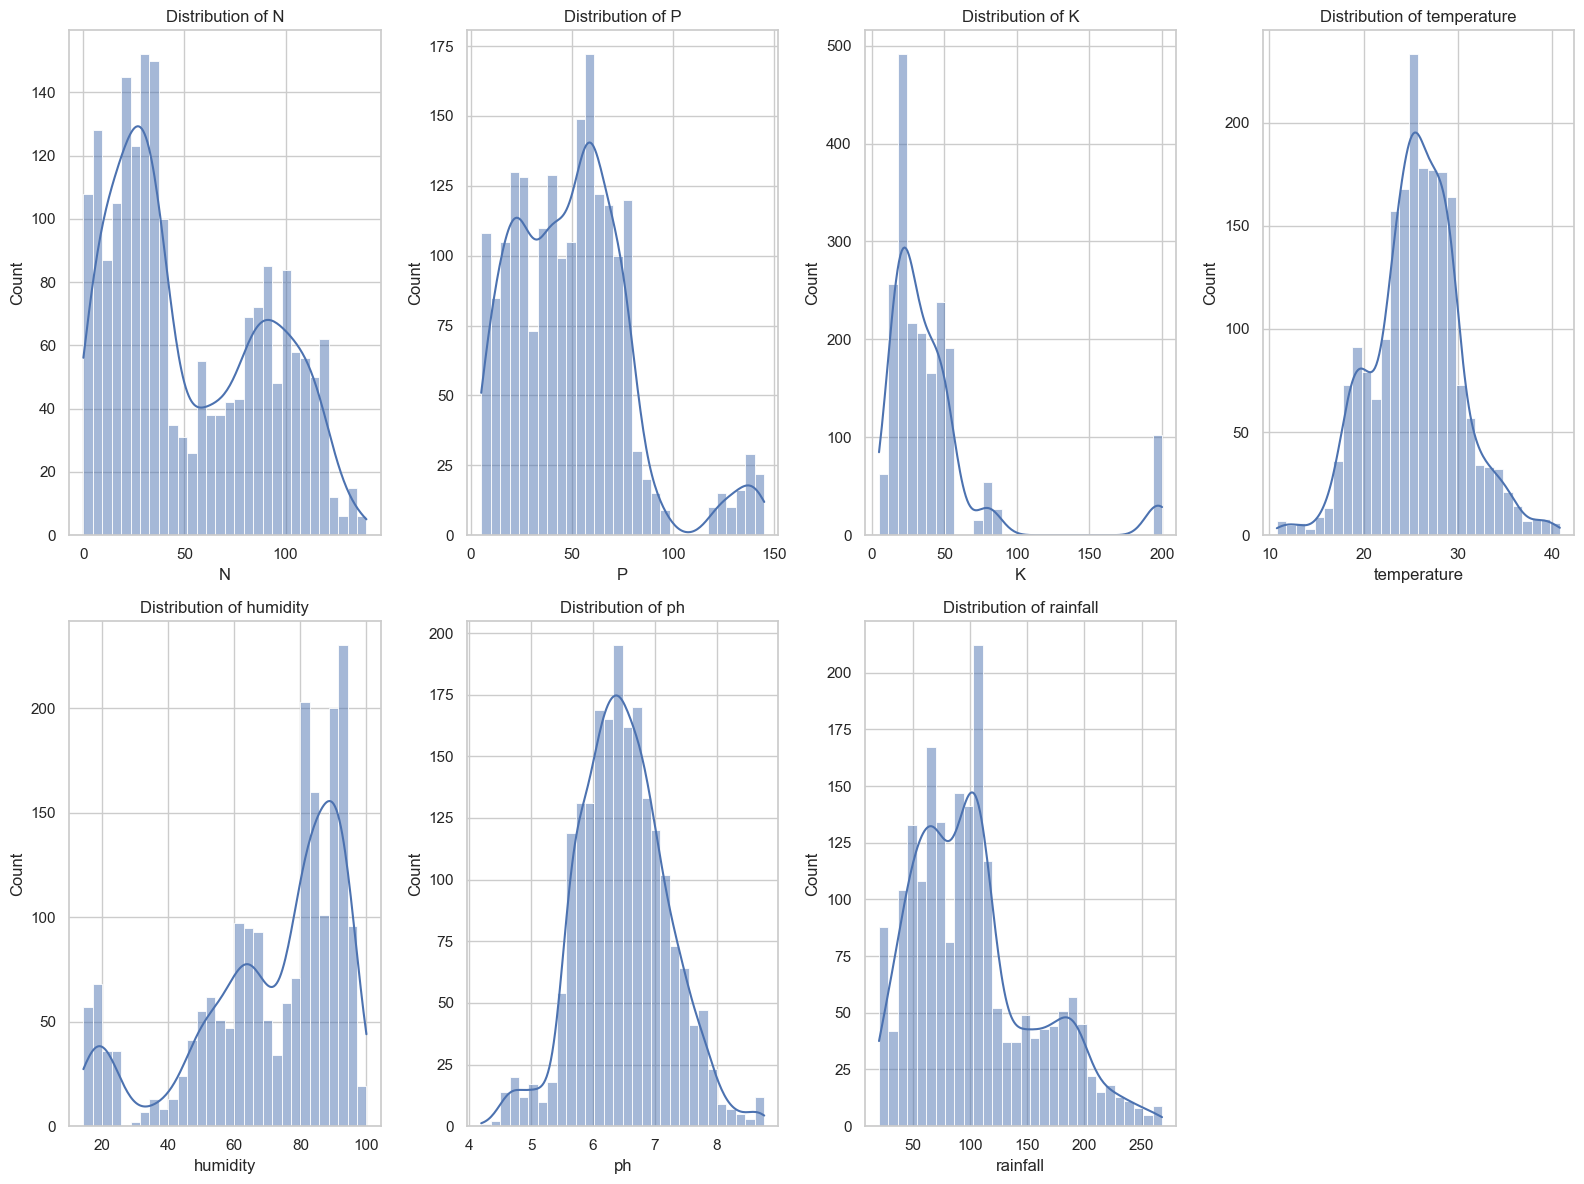

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Plot the distribution of each feature in a 2x4 grid
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

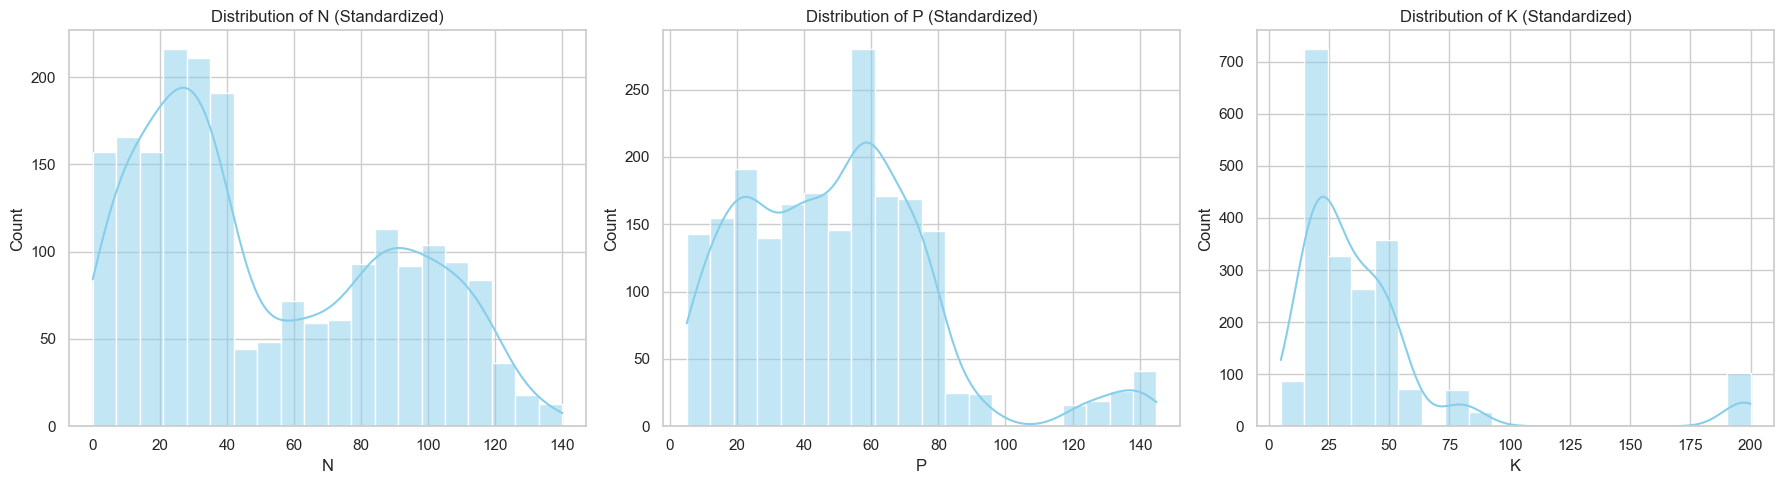

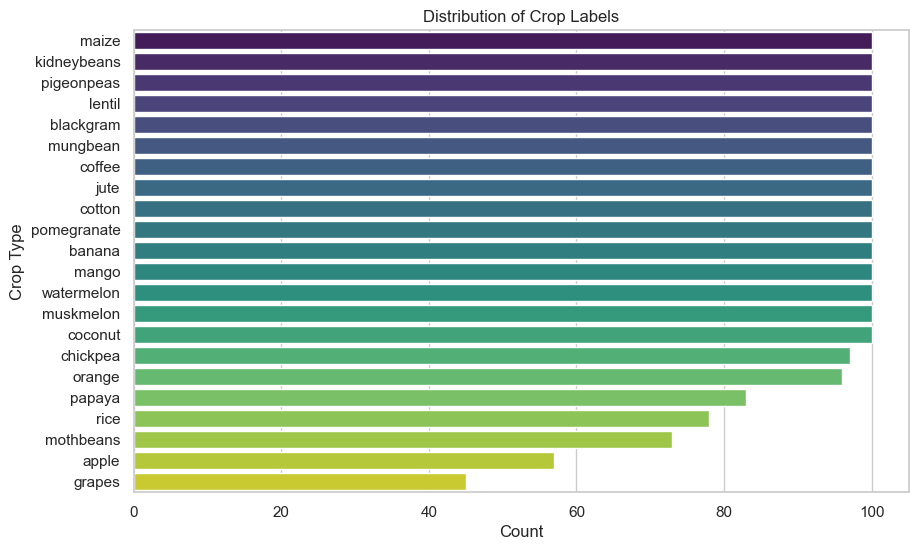

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set(style="whitegrid")

# 1. Distribution of Nutrient Levels (N, P, K)
plt.figure(figsize=(18, 5))
for i, col in enumerate(['N', 'P', 'K']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_cleaned[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col} (Standardized)')
plt.tight_layout()
plt.show()

# 3. Crop Label Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=df, palette='viridis', order=df['label'].value_counts().index)
plt.title('Distribution of Crop Labels')
plt.xlabel('Count')
plt.ylabel('Crop Type')
plt.show()

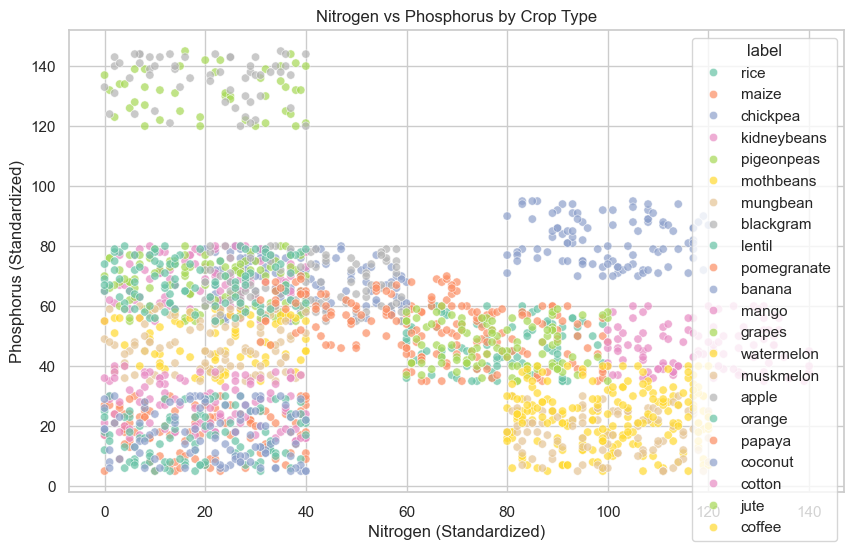

In [49]:
# Scatter plot for N vs P, colored by Crop Label
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='N', y='P', hue='label', palette='Set2', alpha=0.7)
plt.title('Nitrogen vs Phosphorus by Crop Type')
plt.xlabel('Nitrogen (Standardized)')
plt.ylabel('Phosphorus (Standardized)')
plt.show()

### Bivariate Analysis


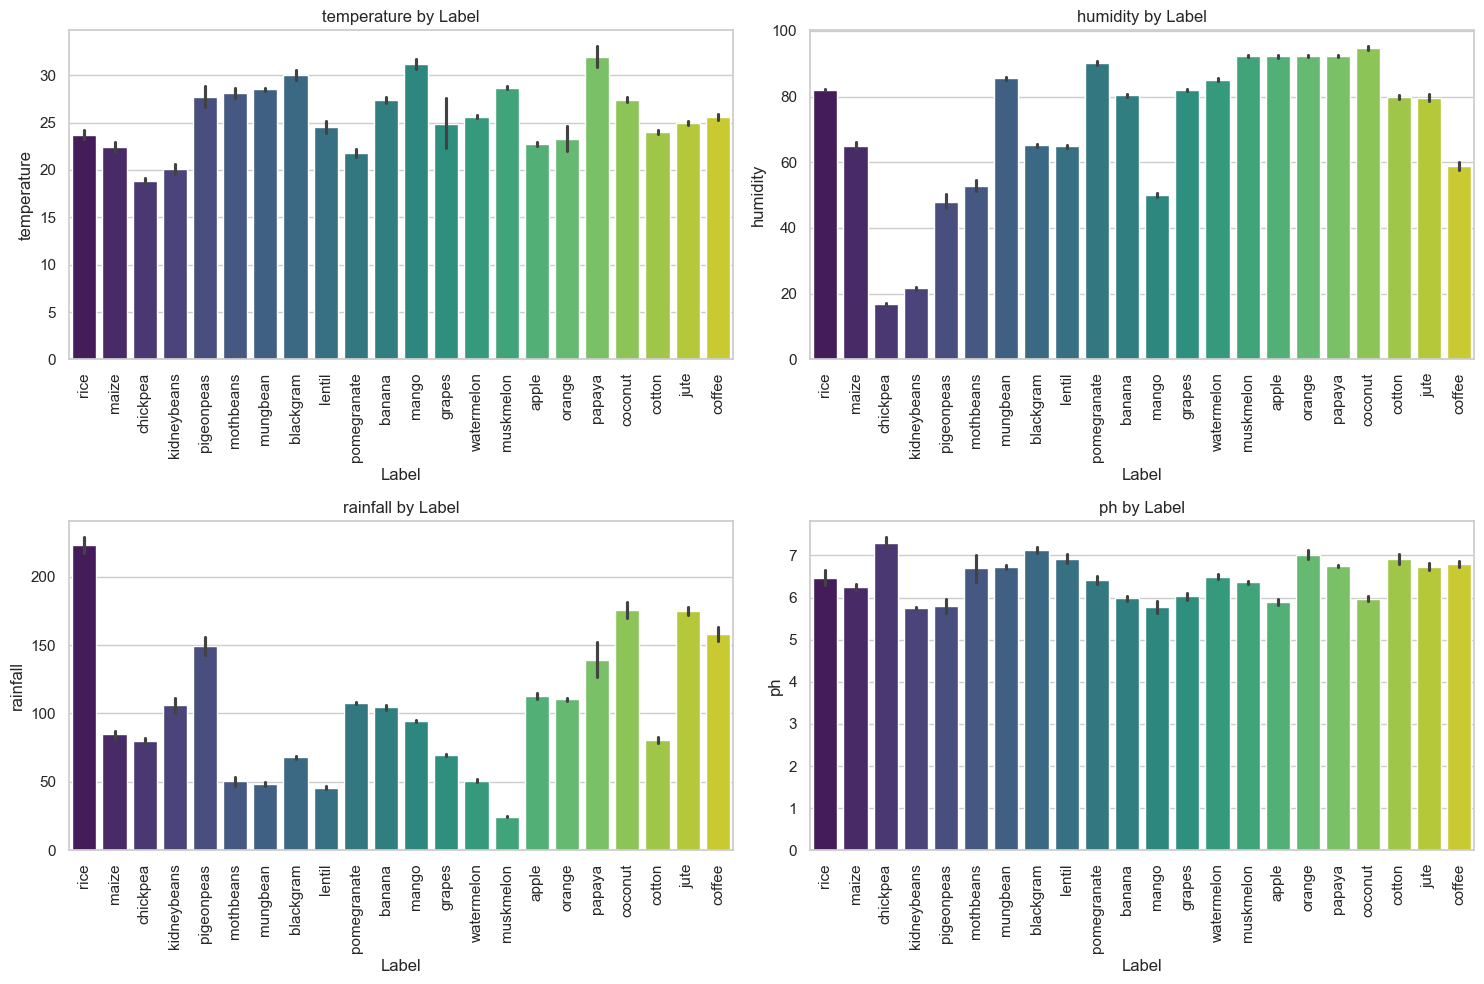

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns to plot
selected_columns = ['temperature', 'humidity', 'rainfall', 'ph']

# Set up the figure size
plt.figure(figsize=(15, 10))

# Loop through each column to create individual bar plots
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=df, x='label', y=col, palette='viridis')
    plt.title(f'{col} by Label')
    plt.xlabel('Label')
    plt.ylabel(col)
    plt.xticks(rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


- Rainfall by Label (Crop)
###### *High Rainfall Requirements*:
  
Rice exhibits high rainfall needs, with rainfall levels reaching over 200 mm, indicating these crop thrive in regions with substantial rainfall.
###### *Moderate Rainfall Requirements*:
  
Pigeonpeas, kidneybeans, pomegranate,apple , orange, papaya, coconut, juite and coffee have moderate rainfall needs, ranging around 100–160 mm.

###### *Low Rainfall Requirements*:
  
Maize, Chickpea, blackgram, mothbeans, watermelon, mango, grapes and cotton show low rainfall requirements, with values around 50 mm or above, making them suitable for drier regions or low-rainfall climates
###### *Very low rainfall*
Mung beans, lentils, and muskmelon can grow in very low rainfall areas, with requirements below 50 mm, showing their adaptability to dry conditions.

- pH by Label (Crop)
###### *Neutral to Slightly Acidic pH Tolerance*:
Most crops have an optimal pH level around 6.0 to 7.0, indicating that they prefer neutral to slightly acidic soils.

###### *Slightly Lower pH Requirements*:
Kidneybeans, pigeonpeas, mango, apple and apple has a lower pH tolerance around 5.5 or a little higher, suggesting it can grow in slightly more acidic conditions compared to other crops.

- Temperature by Label (Crop)
###### *Higher Temperature Preferences*:
Blackgram, Papaya, and mango prefer higher temperatures, around 30°C or above, suggesting they are well-suited for tropical or subtropical climates.
###### *Moderate Temperature Preferences*:
pigeonbeans, mothbeans, mungbean, banana, watermelon, coconut, muskmelon and coffee have moderate temperature requirements, with optimal levels around 25–28°C.
###### *Lower Temperature Preferences*:
Crops like Rice, Maize, chickpeas, kidneybeans, lentil, pomegranate, grapes, apple, orange, cotton and juite  have lower temperature needs, around 25°C or below, making them more adaptable to cooler regions.

- Humidity by Label (Crop)
###### *High Humidity Requirements*:
Rice, mungbean, pomegranate, Banana, grapes, muskmelon, watermelon,apple, papaya, orange, coconut, cotton and juite exhibit high humidity preferences, with levels around 70%–80% or higher, indicating that these crops thrive in regions with consistently high humidity.
###### *Moderate Humidity Requirements*:
Maize, pigeonpeas, mothbeans, blackgram, lentils, mango and coffee prefer moderately high humidity, around 40%–70%, indicating some flexibility in the growing environment.
###### *Low Humidity Tolerance*:
Chickpeas and kidneybeans  have lower humidity requirements, with values below 30%, indicating that they can be cultivated in drier environments.

## Modelling

### Seperating features and target label

In [20]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [21]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [22]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.958128078817734
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         7
      banana       0.94      1.00      0.97        15
   blackgram       1.00      0.88      0.93        16
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        21
      cotton       0.88      1.00      0.94        22
      grapes       1.00      1.00      1.00         7
        jute       0.88      0.88      0.88        25
 kidneybeans       0.95      1.00      0.98        21
      lentil       0.91      1.00      0.95        21
       maize       1.00      0.82      0.90        22
       mango       1.00      1.00      1.00        12
   mothbeans       0.87      0.87      0.87        15
    mungbean       1.00      0.95      0.98        22
   muskmelon       1.00      1.00      1.00        23
      orange       1.00    

In [24]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95073892, 0.95073892, 0.96059113, 0.96305419, 0.94320988])

Logistic regression

- Accuracy: 95.2%
- Classification Report:
    - Precision: Most classes scored well, though blackgram and cotton showed lower precision (0.86).
    - Recall: Generally high but lower for blackgram (0.75) and cotton (0.90).
    - F1-score: Lower for blackgram (0.80) but generally high for others.

Insights:
- Logistic Regression shows solid performance overall, though certain classes may need attention for improved classification.


### Saving trained Logistic Regression model

In [25]:
DT_pkl_filename = "decision_tree_model.pkl"
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  92.36453201970444
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         7
      banana       0.94      1.00      0.97        15
   blackgram       0.80      1.00      0.89        16
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        30
      coffee       1.00      0.90      0.95        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00         7
        jute       1.00      0.24      0.39        25
 kidneybeans       1.00      0.90      0.95        21
      lentil       0.91      1.00      0.95        21
       maize       0.85      1.00      0.92        22
       mango       1.00      0.92      0.96        12
   mothbeans       1.00      0.60      0.75        15
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [27]:
from sklearn.model_selection import cross_val_score
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.96551724, 0.92857143, 0.89901478, 0.90147783, 0.91358025])

Decision Tree
- Accuracy: 90.0%
- Classification Report:
    - Precision: Ranges from 0.00 (for kidneybeans and mothbeans) to 1.00 for other classes.
    - Recall: Ranges from 0.00 (for kidneybeans and mothbeans) to 1.00 for most classes.
    - F1-score: Also ranges from 0.00 (for kidneybeans and mothbeans) to 1.00 for others.
    - Cross-Validation Score: Mean accuracy across 5 folds is approximately 90.7%.

Insights: 
- The Decision Tree performed well for most classes but struggled significantly with kidneybeans and mothbeans, showing potential overfitting or difficulty in distinguishing these classes.

### Saving trained Decision Tree model

In [28]:
import os
# Creating the 'models' directory 
os.makedirs('../models', exist_ok=True)


In [29]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)
predicted_values = RF.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9926108374384236
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         7
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00         7
        jute       0.96      1.00      0.98        25
 kidneybeans       1.00      1.00      1.00        21
      lentil       0.91      1.00      0.95        21
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        12
   mothbeans       1.00      0.87      0.93        15
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [31]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99753695, 0.99261084, 0.99507389, 0.99507389, 0.99012346])

Random Forest
- Accuracy: 99.1%
- Classification Report:
    - Precision: Most classes scored perfectly (1.00), except for blackgram (0.94) and jute (0.90).
    - Recall: High for all classes, with blackgram at 1.00 and jute at 1.00.
    - F1-score: Generally high, but blackgram (0.97) and jute (0.95) are slightly lower.

Insights: 
- The Random Forest model demonstrates outstanding performance with high accuracy and class precision, though attention is needed for blackgram and jute to minimize false positives.


### Saving trained Random Forest model

In [32]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [33]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn import metrics

# Encode target labels as integers
label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(Ytrain)
Ytest_encoded = label_encoder.transform(Ytest)

# Train the model with the encoded labels
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

# Predict and evaluate using the encoded labels
predicted_values = XB.predict(Xtest)

# Calculate accuracy
accuracy = metrics.accuracy_score(Ytest_encoded, predicted_values)
print(f"Accuracy: {accuracy}")

#  Decoding the predicted labels back to their original string form
decoded_predictions = label_encoder.inverse_transform(predicted_values)


Accuracy: 0.9876847290640394


In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Assume `features` is your input data (X), and `target` is your target data (y)

# Step 1: Encode target labels
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Step 2: Initialize the model
XB = xgb.XGBClassifier()

# Step 3: Use cross-validation with encoded target labels
score = cross_val_score(XB, features, target_encoded, cv=5)

print("Cross-validation scores:", score)
print("Average cross-validation score:", score.mean())


Cross-validation scores: [0.99014778 0.98522167 0.99014778 0.99507389 0.98518519]
Average cross-validation score: 0.9891552636380222


- Accuracy: 99.1%
- Classification Report:
    - Precision: Similar to Random Forest, with most classes scoring 1.00, but blackgram and jute showed slightly lower precision (0.94 and 0.90, respectively).
    - Recall: Consistently high across classes, especially blackgram (1.00) and jute (1.00).
    - F1-score: High for all classes, with minor drops for blackgram (0.97) and jute (0.95).

Insights:
- XGBoost also achieves excellent performance and matches Random Forest’s accuracy. The model is reliable overall, but the same classes (blackgram and jute) warrant further analysis to improve precision.



### Saving trained XGBoost model

In [35]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '../models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

# Guassian Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)
predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9901477832512315
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         7
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00         7
        jute       0.89      1.00      0.94        25
 kidneybeans       1.00      1.00      1.00        21
      lentil       0.95      1.00      0.98        21
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        12
   mothbeans       1.00      0.93      0.97        15
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [37]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99753695, 0.99507389, 0.99507389, 0.99014778, 0.99259259])

Gaussian Naive Bayes
- Accuracy: 99.1%
- Classification Report:
    - Precision: Most classes achieved 1.00, with rice at 1.00 but with a lower recall of 0.75.
    - Recall: Most classes achieved 1.00, except for rice, which had a recall of 0.75.
    - F1-score: Approaches 1.00 for most classes, with the exception of rice.
    - Cross-Validation Score: Mean accuracy across 5 folds is approximately 99.5%.

Insights:

- Naive Bayes achieved high accuracy and performance across most classes. The only notable issue is with rice, which may indicate a class imbalance or a need for more data.

### Saving trained Guassian Naive Bayes model

In [38]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [39]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9901477832512315
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         7
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00         7
        jute       0.89      0.96      0.92        25
 kidneybeans       1.00      1.00      1.00        21
      lentil       1.00      1.00      1.00        21
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        12
   mothbeans       1.00      1.00      1.00        15
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [40]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.9729064 , 0.98029557, 0.99014778, 0.98029557, 0.98518519])

SVM
- Accuracy: 97.9%
- Classification Report:
    - Precision: Most classes achieved 1.00; rice had a precision of 0.80.
    - Recall: Most classes scored 1.00, while rice scored 0.75.
    - F1-score: Generally high, with rice again being the lowest at 0.77.
    - Cross-Validation Score: Mean accuracy across 5 folds is approximately 98.1%.

Insights: 
- SVM performed exceptionally well across the board, with minor issues in precision and recall for rice, indicating similar challenges to Naive Bayes in that class.


##### Saving trained SVM model

In [41]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

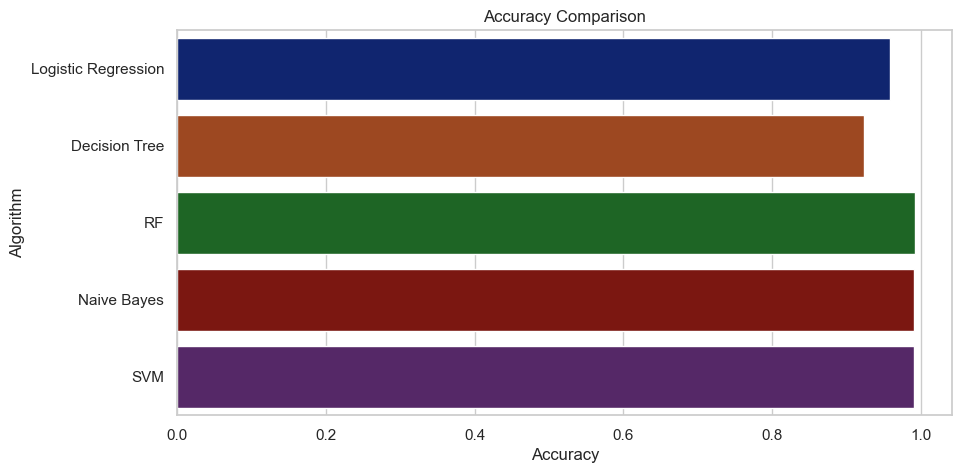

In [42]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [43]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Logistic Regression --> 0.958128078817734
Decision Tree --> 0.9236453201970444
RF --> 0.9926108374384236
Naive Bayes --> 0.9901477832512315
SVM --> 0.9901477832512315


## Making a prediction

In [44]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [45]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['coffee']
